In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing data into dataframe
df = pd.read_csv('../data/raw/fff_Bw_1min.dat', delim_whitespace=True)

#Adding column names to dataframe
df.columns = ['year', 'month', 'day', 'hour', 'minute', 
              'L', 'MLT', 'MLAT', 'AL Index', 
              'KP Index', 'Satellite Flag', 'B']

# Converting year + month + day + hour + minute + second to datetime
datetime = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])

# Adding datetime column to dataframe
df.insert(0, "datetime", datetime, True)

# Dropping useless columns
df = df.drop(['year', 'month', 'day', 'hour', 'minute', 'AL Index', 'KP Index'], axis=1)

df.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,L,MLT,MLAT,Satellite Flag,B
0,2010-06-01 10:51:00,9.13,22.69,-1.43,0.0,0.000765
1,2010-06-01 10:52:00,9.03,22.7,-1.44,0.0,0.000699
2,2010-06-01 10:53:00,9.02,22.7,-1.45,0.0,0.000786
3,2010-06-01 10:54:00,9.06,22.71,-1.46,0.0,0.000748
4,2010-06-01 10:55:00,8.95,22.72,-1.48,0.0,0.000933


In [3]:
df['Satellite Flag'].value_counts()

0.000000    482881
1.000000    461864
2.000000    459017
0.001010      2519
0.001040      2455
             ...  
0.169000         1
0.236000         1
0.000566         1
0.088200         1
0.278000         1
Name: Satellite Flag, Length: 2334, dtype: int64

In [4]:
# Converting satellite flag values to int
df['Satellite Flag'] = df['Satellite Flag'].astype(int)
df['Satellite Flag'].value_counts()

0    738633
1    461864
2    459017
Name: Satellite Flag, dtype: int64

In [5]:
df_sat0 = df.loc[(df['Satellite Flag'] == 0)]
df_sat0.tail()

,datetime,L,MLT,MLAT,Satellite Flag,B
1659252,2018-02-28 14:39:00,9.80,22.85-12.11,-185.0,0,NaN
1659253,2018-02-28 14:40:00,9.89,22.86-12.11,-196.0,0,NaN
1659254,2018-02-28 14:41:00,9.88,22.86-12.11,-204.0,0,NaN
1659255,2018-02-28 14:42:00,9.91,22.87-12.10,-197.0,0,NaN
1659256,2018-02-28 14:43:00,9.94,22.87-12.10,-177.0,0,NaN


In [6]:
df_sat0['Satellite Flag'].value_counts()

0    738633
Name: Satellite Flag, dtype: int64

In [7]:
df_sat0_sorted = df_sat0.sort_values(by = 'datetime')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([733773., 734138., 734503., 734869., 735234., 735599., 735964.,
        736330., 736695.]), <a list of 9 Text xticklabel objects>)

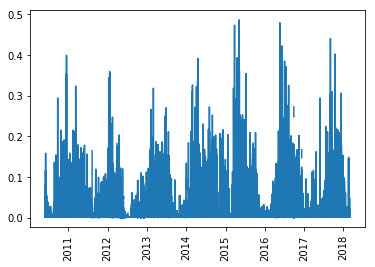

In [8]:
# Plotting data for 1 satellite to see if there is a trend
plt.plot(df_sat0_sorted['datetime'], df_sat0_sorted['B'])
plt.xticks(rotation='vertical')

In [9]:
# Check if measurements are being taken every minute or not
df_sat0_sorted['datetime_diff'] = df_sat0_sorted['datetime'].diff()
df_sat0_sorted.head()
#pd.set_option('display.max_rows', df_sat0_sorted.shape[0]+1)
df_sat0_sorted['datetime_diff'].value_counts()

0 days 00:01:00    643432
0 days 00:00:00     83976
0 days 00:02:00      3394
0 days 00:03:00      1405
0 days 00:04:00       700
                    ...  
3 days 02:23:00         1
1 days 19:32:00         1
0 days 15:30:00         1
0 days 17:05:00         1
0 days 02:14:00         1
Name: datetime_diff, Length: 1526, dtype: int64

In [10]:
# Total missing time
df_sat0_sorted['datetime_diff'].sum()

Timedelta('2829 days 03:52:00')

In [11]:
print((2829 - 643432/(24*60))/365)

6.526499238964993


In [12]:
# So assuming time step of 1 minute, out of 7.5 years, basically 6.5 years worth of data is missing!!!!
# Maybe we can use a bigger time step!!

#set a timestep



In [13]:
# Clearly there is missing data, we can use some technique to fill it
# Insert missing rows
# Set datetime as the index with frequency of 1 minute
# Dropping duplicates
df_sat0_sorted_1 = df_sat0_sorted[~df_sat0_sorted.datetime.duplicated()]
df_sat0_sorted_1 = df_sat0_sorted_1.set_index('datetime').asfreq('1Min')
print("Old dataframe size =", df_sat0_sorted.size)
print("New dataframe size =", df_sat0_sorted_1.size)

Old dataframe size = 5170431
New dataframe size = 24443958


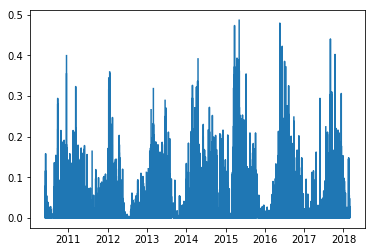

In [14]:
# Plotting data again
plt.plot(df_sat0_sorted_1['B'])

In [15]:
# Run LSTM/ARIMA/ARCH/VAR
